In [1]:
import pandas as pd
import tensorflow as tf

/home/danyang/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/danyang/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/danyang/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/danyang/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
traindata = pd.read_csv('../北京PM2.5浓度回归分析训练赛/pm25_train.csv')

In [3]:
traindata

,date,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,2010-01-02,0,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
1,2010-01-02,1,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2,2010-01-02,2,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
3,2010-01-02,3,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
4,2010-01-02,4,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35741,2014-12-31,19,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
35742,2014-12-31,20,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
35743,2014-12-31,21,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0
35744,2014-12-31,22,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0


In [5]:
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/home/danyang/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


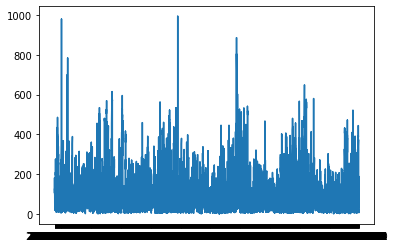

In [125]:
%pylab inline
plt.plot(traindata['date'],traindata['pm2.5'])

In [4]:
traindata['month']=0

In [5]:
for i in range(35746):
    traindata['month'][i] = int(traindata['date'][i].split('-')[1])

/home/danyang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
traindata

,date,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,month
0,2010-01-02,0,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0,1
1,2010-01-02,1,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0,1
2,2010-01-02,2,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0,1
3,2010-01-02,3,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0,1
4,2010-01-02,4,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35741,2014-12-31,19,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0,12
35742,2014-12-31,20,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0,12
35743,2014-12-31,21,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0,12
35744,2014-12-31,22,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0,12


In [8]:
traindata = traindata.drop('date',axis = 1)
traindata = traindata.drop('pm2.5',axis = 1)

In [7]:
label = traindata['pm2.5']

In [9]:
traindata

,hour,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,month
0,0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0,1
1,1,-15,-4.0,1020.0,2.68,0,0,0,0,1,0,1
2,2,-11,-5.0,1021.0,3.57,0,0,0,0,1,0,1
3,3,-7,-5.0,1022.0,5.36,1,0,0,0,1,0,1
4,4,-7,-5.0,1022.0,6.25,2,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
35741,19,-23,-2.0,1034.0,231.97,0,0,0,1,0,0,12
35742,20,-22,-3.0,1034.0,237.78,0,0,0,1,0,0,12
35743,21,-22,-3.0,1034.0,242.70,0,0,0,1,0,0,12
35744,22,-22,-4.0,1034.0,246.72,0,0,0,1,0,0,12


In [28]:
# Parameters
learning_rate = 0.01
num_steps = 500
batch_size = 128
display_step = 100
batch_num = 0
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 512 # 2nd layer number of neurons
num_input = 12 
num_out = 1 
model_path = "./pm2.5_model.ckpt"

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_out])
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_out]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_out]))
}
# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer
# Construct model
logits = neural_net(X)

# Define loss and optimizer
c = tf.square(logits - Y)
loss_op = tf.reduce_mean(c) 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
'''
# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
'''
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [29]:
saver = tf.train.Saver()

In [30]:
def next_batch(data, label, i, batch_size):
    batch_data = data[i*batch_size:(i+1)*batch_size,:]
    batch_label = label[i*batch_size:(i+1)*batch_size,:]

    return batch_data, batch_label

In [31]:
import numpy as np
import math

In [32]:
a = np.array(traindata)
b = np.array(label)

In [33]:
b = b.reshape(-1, 1)

In [34]:
b

array([[129.],
       [148.],
       [159.],
       ...,
       [ 10.],
       [  8.],
       [ 12.]])

In [35]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, 100000+1):
        if batch_num < math.floor(35746/batch_size):
            batch_x, batch_y = next_batch(a, b, batch_num, batch_size)
            batch_num = batch_num + 1
        
        
            # Run optimization op (backprop)
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
            if step % 5000 == 0 or step == 1:
                # Calculate batch loss and accuracy
                loss = sess.run(loss_op, feed_dict={X: batch_x, Y: batch_y})
                print("Step " + str(step) + ", Minibatch Loss= " + \
                      "{:.4f}".format(loss))
        else:
            batch_num = 0

    print("Optimization Finished!")
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)

Step 1, Minibatch Loss= 791578083328.0000
Step 5000, Minibatch Loss= 1662941.2500
Step 10000, Minibatch Loss= 1653134.5000
Step 15000, Minibatch Loss= 151984.3125
Step 20000, Minibatch Loss= 69747.5312
Step 25000, Minibatch Loss= 1612470.8750
Step 30000, Minibatch Loss= 93157.7031
Step 40000, Minibatch Loss= 13222.1807
Step 45000, Minibatch Loss= 1237.7966
Step 50000, Minibatch Loss= 9394.4766
Step 55000, Minibatch Loss= 14496.3926
Step 60000, Minibatch Loss= 6842.1299
Step 65000, Minibatch Loss= 5639.8076
Step 75000, Minibatch Loss= 13635.5176
Step 80000, Minibatch Loss= 991.9156
Step 85000, Minibatch Loss= 4588.5527
Step 90000, Minibatch Loss= 10879.6025
Step 95000, Minibatch Loss= 7585.4224
Step 100000, Minibatch Loss= 6239.7588
Optimization Finished!
Model saved in file: ./pm2.5_model.ckpt


In [18]:
testdata = pd.read_csv('../北京PM2.5浓度回归分析训练赛/pm25_test.csv')

In [19]:
testdata

,date,hour,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,2010-01-07,0,-21,-16.0,1035.0,8.95,0,0,0,1,0,0
1,2010-01-07,1,-21,-16.0,1035.0,0.45,0,0,0,0,0,1
2,2010-01-07,2,-22,-18.0,1036.0,1.34,0,0,0,0,0,1
3,2010-01-07,3,-23,-15.0,1036.0,4.02,0,0,0,1,0,0
4,2010-01-07,4,-24,-16.0,1035.0,7.15,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6006,2014-12-25,19,-11,-1.0,1032.0,2.67,0,0,0,0,0,1
6007,2014-12-25,20,-11,-2.0,1032.0,1.79,0,0,0,0,1,0
6008,2014-12-25,21,-11,0.0,1033.0,0.89,0,0,0,0,0,1
6009,2014-12-25,22,-12,-3.0,1033.0,0.89,0,0,0,0,1,0


In [20]:
testdata['month'] = 0
for i in range(6011):
    testdata['month'][i] = int(testdata['date'][i].split('-')[1])

/home/danyang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
testdata = testdata.drop('date',axis = 1)

In [22]:
testdata

,hour,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,month
0,0,-21,-16.0,1035.0,8.95,0,0,0,1,0,0,1
1,1,-21,-16.0,1035.0,0.45,0,0,0,0,0,1,1
2,2,-22,-18.0,1036.0,1.34,0,0,0,0,0,1,1
3,3,-23,-15.0,1036.0,4.02,0,0,0,1,0,0,1
4,4,-24,-16.0,1035.0,7.15,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6006,19,-11,-1.0,1032.0,2.67,0,0,0,0,0,1,12
6007,20,-11,-2.0,1032.0,1.79,0,0,0,0,1,0,12
6008,21,-11,0.0,1033.0,0.89,0,0,0,0,0,1,12
6009,22,-12,-3.0,1033.0,0.89,0,0,0,0,1,0,12


In [23]:
a = np.array(testdata)

In [24]:
with tf.Session() as sess:
    # Initialize variables
    sess.run(init)

    # Restore model weights from previously saved model
    load_path = saver.restore(sess, )
    res = sess.run(logits, feed_dict={X: a})

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./pm2.5_model.ckpt


In [25]:
res.shape

(6011, 1)

In [26]:
res = pd.DataFrame(res)

In [27]:
res.to_csv('./result.csv')